In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('../datasets/dogs.csv')

In [3]:
data

,breed,height,weight
0,Border Collie,20,45
1,Boston Terrier,16,20
2,Brittany Spaniel,18,35
3,Bullmastiff,27,120
4,Chihuahua,8,8
5,German Shepherd,25,78
6,Golden Retriever,23,70
7,Great Dane,32,160
8,Portuguese Water Dog,21,50
9,Standard Poodle,19,65


In [4]:
feature_names = data.columns[1:]

In [5]:
X = data[feature_names]

In [6]:
X

,height,weight
0,20,45
1,16,20
2,18,35
3,27,120
4,8,8
5,25,78
6,23,70
7,32,160
8,21,50
9,19,65


In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler()

In [9]:
scaler.fit(X)

MinMaxScaler()

In [10]:
X = pd.DataFrame(scaler.transform(X), columns=feature_names)

In [11]:
X

,height,weight
0,0.538462,0.248366
1,0.384615,0.084967
2,0.461538,0.183007
3,0.807692,0.738562
4,0.076923,0.006536
5,0.730769,0.464052
6,0.653846,0.411765
7,1.000000,1.000000
8,0.576923,0.281046
9,0.500000,0.379085


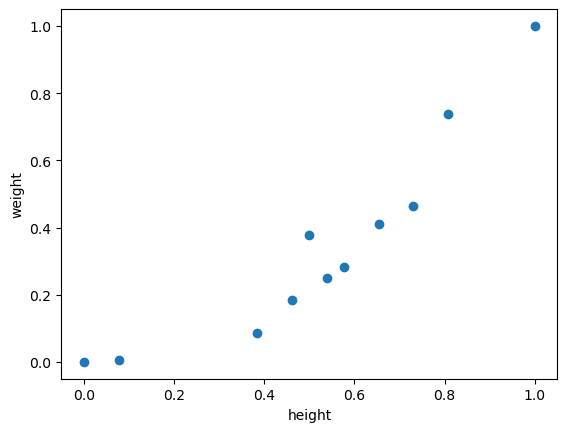

In [12]:
plt.scatter(X['height'], X['weight'])
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

In [13]:
from sklearn.cluster import KMeans

In [14]:
kmeans = KMeans(n_clusters=2, n_init='auto')

In [15]:
kmeans.fit(X)

KMeans(n_clusters=2)

In [16]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=feature_names)

In [17]:
centroids

,height,weight
0,0.153846,0.030501
1,0.658654,0.463235


In [18]:
kmeans.labels_

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int32)

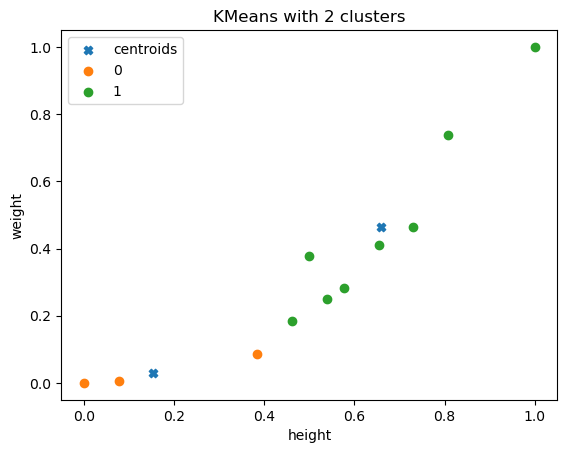

In [20]:
plt.scatter(centroids['height'], centroids['weight'], marker='X', label='centroids')

for c in np.unique(kmeans.labels_):
    elems = X[kmeans.labels_ == c]
    plt.scatter(elems['height'], elems['weight'], label=c)
    
plt.xlabel('height')
plt.ylabel('weight')
plt.legend()
plt.title('KMeans with 2 clusters')
plt.show()

In [21]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [23]:
silhouette_values = silhouette_samples(X, kmeans.labels_)
silhouette_values

array([ 0.28981652,  0.242704  , -0.12137722,  0.53267774,  0.73560541,
        0.57851663,  0.56163616,  0.43579723,  0.40507931,  0.39309297,
        0.71035336])

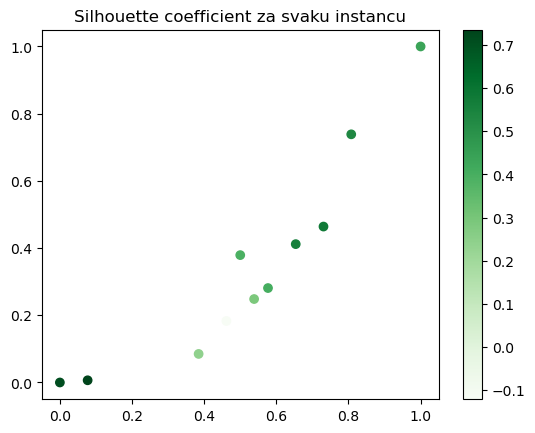

In [24]:
plt.scatter(X['height'], X['weight'], c=silhouette_values, cmap='Greens')
plt.colorbar()
plt.title('Silhouette coefficient za svaku instancu')
plt.show()

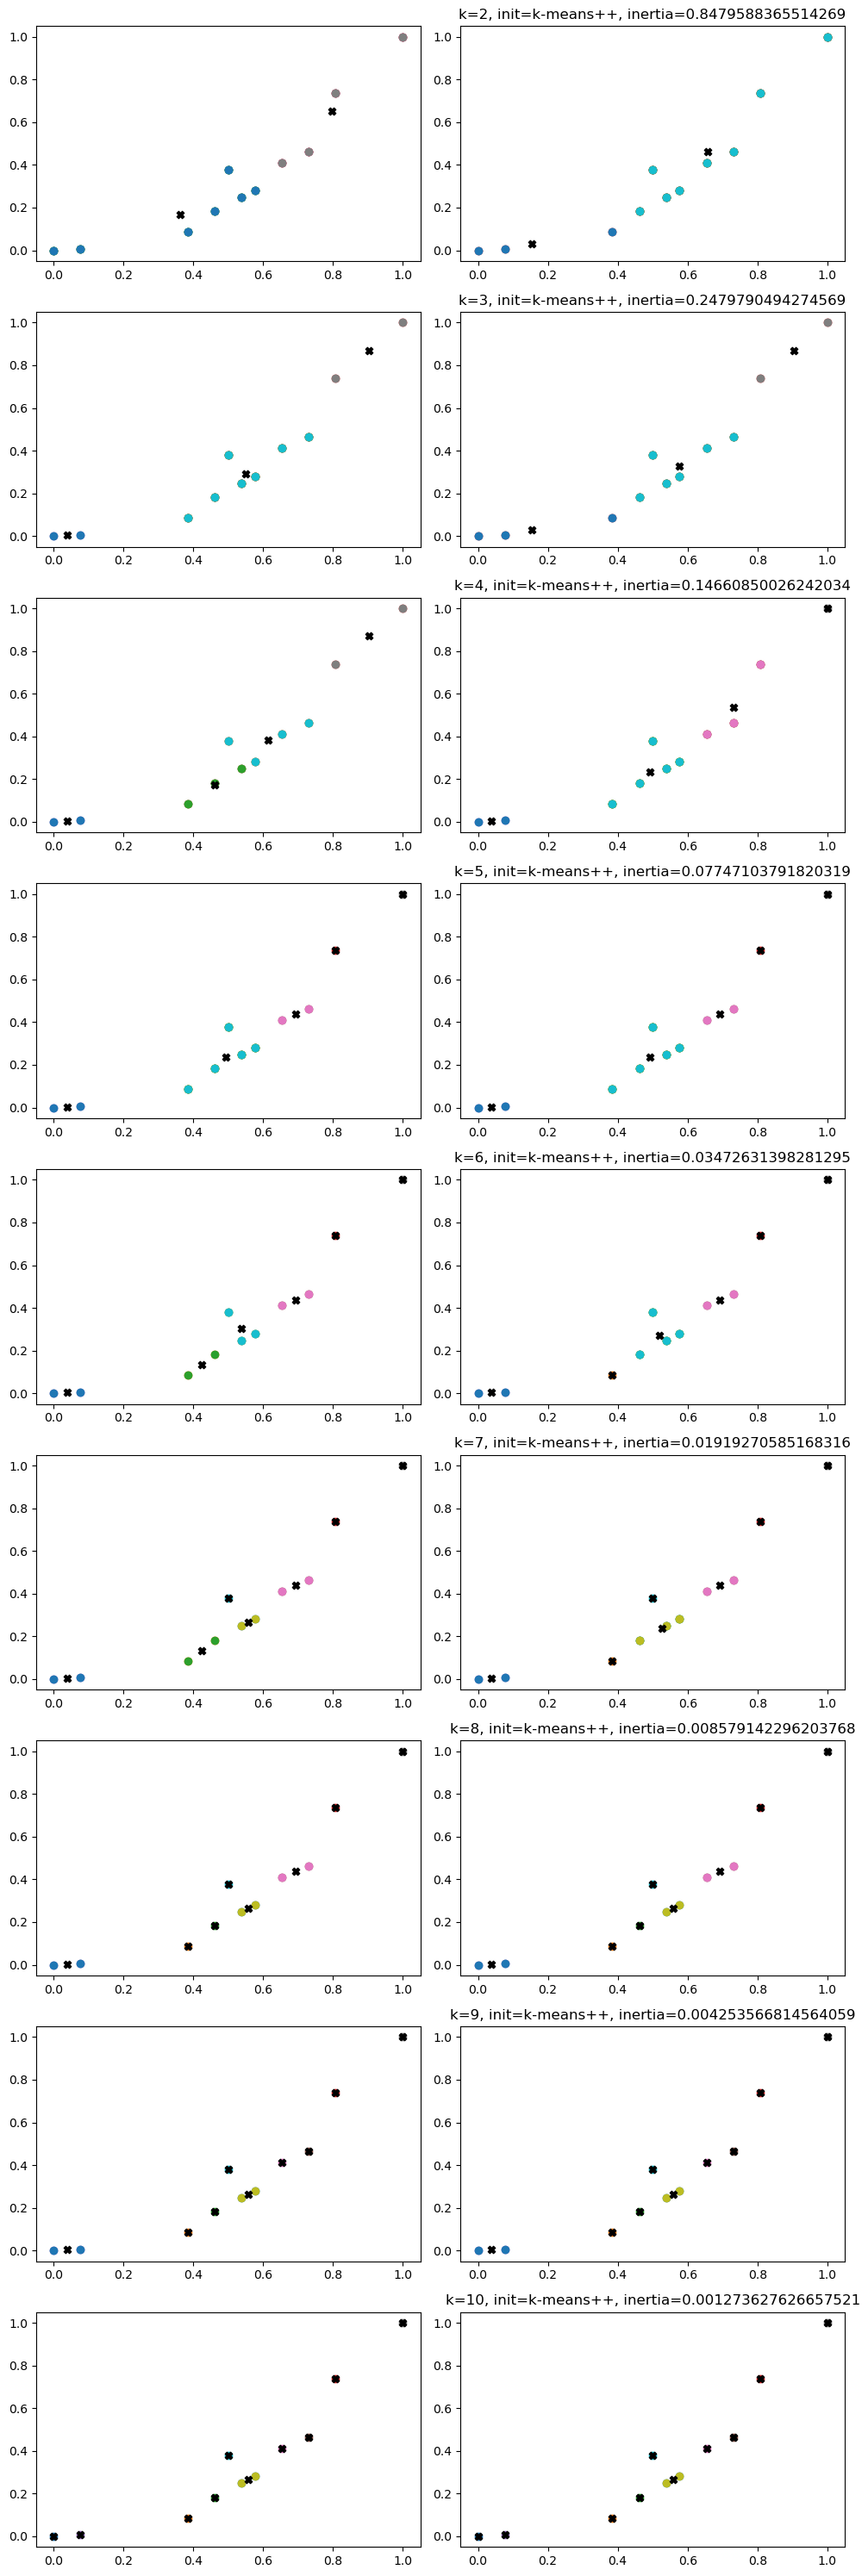

In [28]:
ks = range(2, X.shape[0])
inits = ['random', 'k-means++']
fig = plt.figure(figsize=(10, 30))
idx = 1
silhouette = []
inertia = []

for k in ks:
    for init in inits:
        kmeans = KMeans(n_clusters=k, init=init, n_init='auto')
        kmeans.fit(X)
        
        if init == 'k-means++':
            silhouette.append(silhouette_score(X, kmeans.labels_))
            inertia.append(kmeans.inertia_)
            
        fig.add_subplot(len(ks), len(inits), idx)
        idx += 1
        
        for c in kmeans.labels_:
            elems = X[kmeans.labels_ == c]
            plt.scatter(elems['height'], elems['weight'], label=c)
            
        centroids = pd.DataFrame(kmeans.cluster_centers_, columns=feature_names)
        plt.scatter(centroids['height'], centroids['weight'], label='centroids', marker='X', color='black')
        
    plt.title(f'k={k}, init={init}, inertia={kmeans.inertia_}')
    
plt.tight_layout()

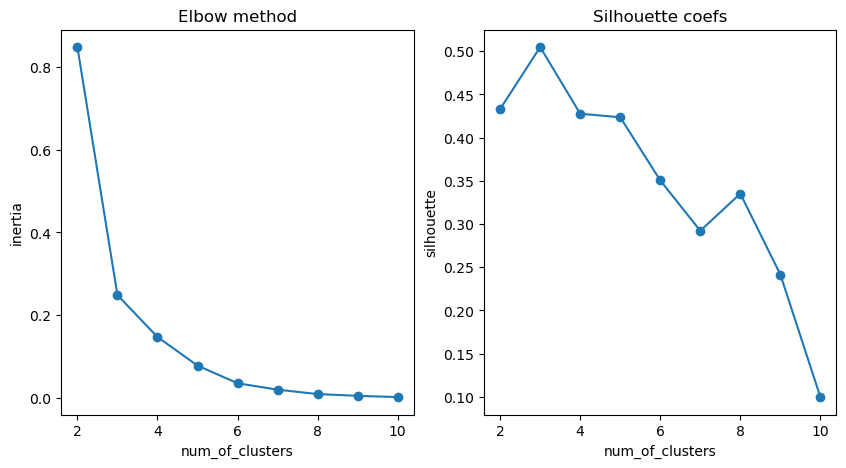

In [29]:
fig = plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(ks, inertia, marker='o')
plt.xlabel('num_of_clusters')
plt.ylabel('inertia')
plt.title('Elbow method')

plt.subplot(1, 2, 2)
plt.plot(ks, silhouette, marker='o')
plt.xlabel('num_of_clusters')
plt.ylabel('silhouette')
plt.title('Silhouette coefs')

plt.show()

In [30]:
# KOMPRESIJA SLIEK:

In [31]:
from matplotlib.image import imread

In [32]:
img = imread('../datasets/masa.jpg')

In [33]:
img_size = img.shape

In [34]:
X_img = img.reshape(img_size[0]*img_size[1], img_size[2])

In [35]:
kmeans = KMeans(n_clusters=30, n_init='auto')

In [36]:
kmeans.fit(X_img)

KMeans(n_clusters=30)

In [37]:
X_compressed = kmeans.cluster_centers_[kmeans.labels_]

In [38]:
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)

In [39]:
X_compressed = X_compressed.reshape(img_size[0], img_size[1], img_size[2])

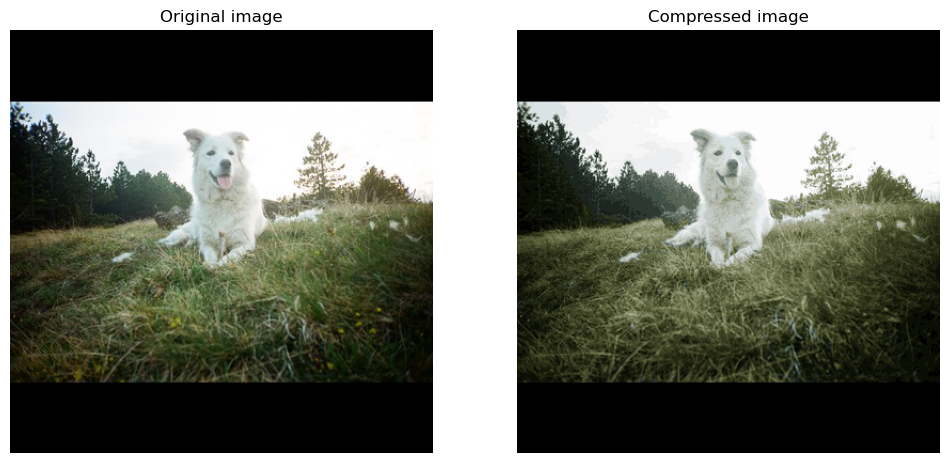

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

ax[0].imshow(img)
ax[0].set_title('Original image')

ax[1].imshow(X_compressed)
ax[1].set_title('Compressed image')

for axis in fig.axes:
    axis.axis('off')
    
plt.show()

In [45]:
from sklearn.cluster import BisectingKMeans

In [46]:
bkmeans = BisectingKMeans(n_clusters=3, bisecting_strategy='largest_cluster')

In [47]:
bkmeans.fit(X)

BisectingKMeans(bisecting_strategy='largest_cluster', n_clusters=3)

In [48]:
centroids = pd.DataFrame(bkmeans.cluster_centers_, columns=feature_names)

In [49]:
centroids

,height,weight
0,0.549451,0.293184
1,0.038462,0.003268
2,0.903846,0.869281


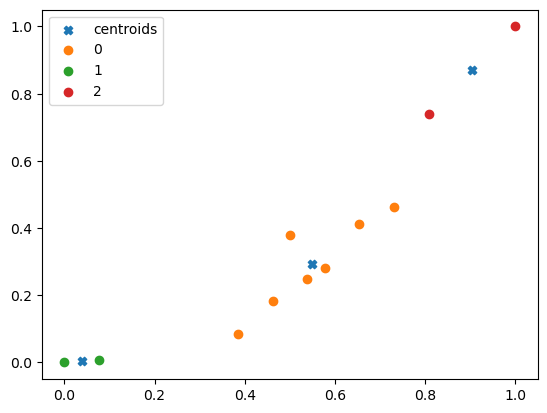

In [51]:
plt.scatter(centroids['height'], centroids['weight'], marker='X', label='centroids')

for c in np.unique(bkmeans.labels_):
    elems = X[bkmeans.labels_ == c]
    plt.scatter(elems['height'], elems['weight'], label=c)
    
plt.legend()
plt.show()

In [52]:
from fcmeans import FCM

In [53]:
fcm = FCM(n_clusters=3, m=3)

In [54]:
fcm.fit(X.to_numpy())

In [55]:
labels = fcm.predict(X.to_numpy())

In [56]:
centroids = fcm.centers

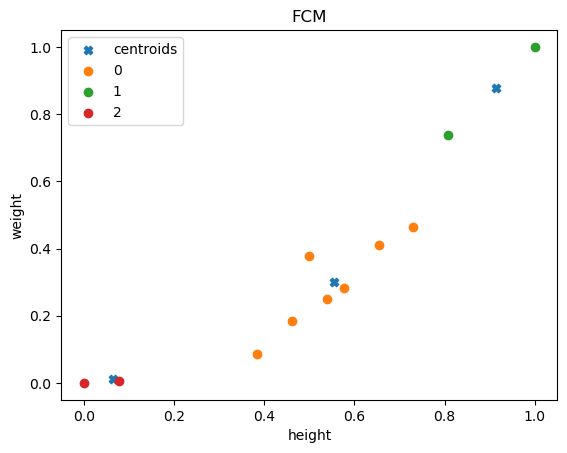

In [57]:
plt.scatter(centroids[:,0], centroids[:,1], marker='X', label='centroids')

for c in np.unique(labels):
    elems = X[labels == c]
    plt.scatter(elems['height'], elems['weight'], label=c)
    
plt.legend()
plt.title('FCM')
plt.xlabel('height')
plt.ylabel('weight')
plt.show()

In [58]:
import seaborn as sns

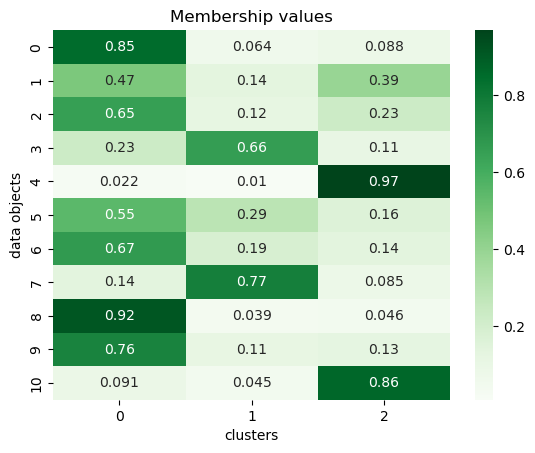

In [59]:
sns.heatmap(fcm.soft_predict(X.to_numpy()), cmap='Greens', annot=True)
plt.title('Membership values')
plt.xlabel('clusters')
plt.ylabel('data objects')
plt.show()